In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def show_images(images, titles=None):
    fig, ax = plt.subplots(ncols=len(images), figsize=(len(images)*5,5))

    for idx, image in enumerate(images):
        ax[idx].imshow(image, cmap='gray')
        ax[idx].axis(False)
        if(titles != None):
            ax[idx].set_title(titles[idx])
    return

# 1. versuch

In [2]:
img = cv2.imread("cam1.jpg")


In [3]:
#cv2.imshow("img",img)
#cv2.waitKey()
#cv2.destroyAllWindows()

(1080, 1920, 3)
[[ 84 102  95]
 [ 84 102  95]
 [ 84 102  95]
 ...
 [  1   1   1]
 [  2   2   2]
 [  3   3   3]]
[[ 82 101  92]
 [ 82 101  92]
 [ 82 101  92]
 ...
 [  1   1   1]
 [  1   1   1]
 [  1   1   1]]
[[ 82 102  89]
 [ 82 102  89]
 [ 83 101  88]
 ...
 [  1   1   1]
 [  1   1   1]
 [  1   1   1]]


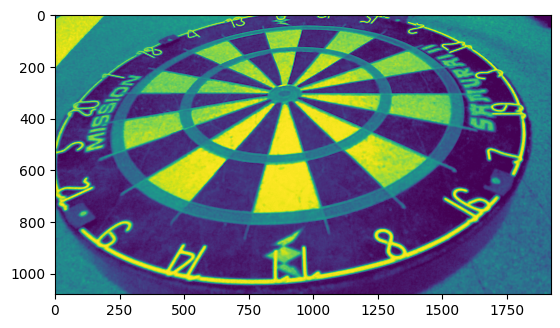

In [4]:
print(img.shape)
print(img[0])
print(img[1])
print(img[2])

plt.imshow(img[...,0])


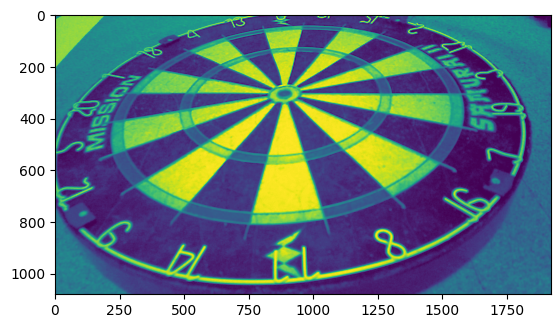

In [5]:
plt.imshow(img[...,1])


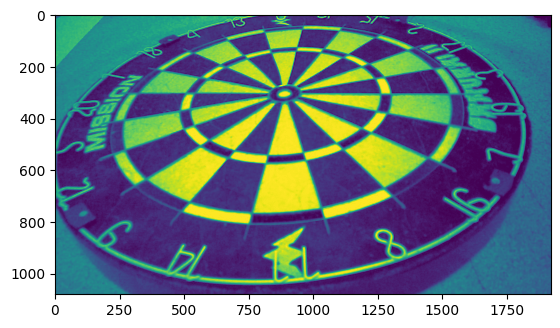

In [6]:
plt.imshow(img[...,2])

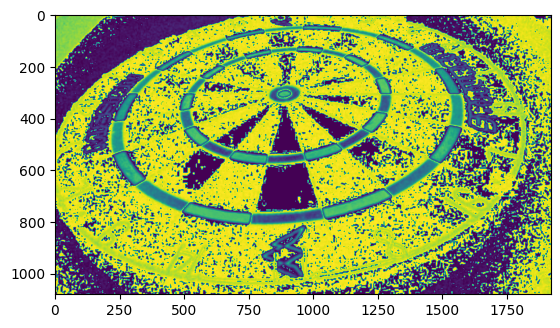

In [7]:
test = img[...,2] - img[...,1]
plt.imshow(test)

In [8]:
import cv2
import numpy as np
import imutils
from skimage import io, img_as_float, exposure


def nothing(x):
    pass


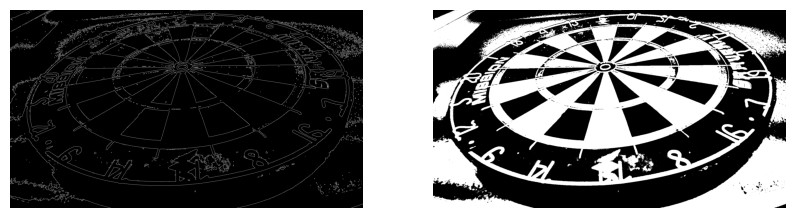

In [9]:
# Load an image
img = cv2.imread('./images/WIN_20240109_20_42_21_Pro.jpg')

# Resize The image
#if img.shape[1] > 600:
#    img = imutils.resize(img, width=600)

# Create a window
#cv2.namedWindow('Treshed')

# create trackbars for treshold change
#cv2.createTrackbar('Treshold','Treshed',0,255,nothing)


#while(1):
  
    # Clone original image to not overlap drawings
clone = img.copy()

# Convert to gray
gray = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)

# get current positions of four trackbars
#r = cv2.getTrackbarPos('Treshold','Treshed')
#für dieses Beispiel eignet sich 83 als guter threshold
r = 83

# Thresholding the gray image
ret,gray_threshed = cv2.threshold(gray,r,255,cv2.THRESH_BINARY)

# Blur an image
bilateral_filtered_image = cv2.bilateralFilter(gray_threshed, 5, 175, 175)

# Detect edges
edge_detected_image_1 = cv2.Canny(gray_threshed, 75, 200)

show_images([edge_detected_image_1,gray_threshed])

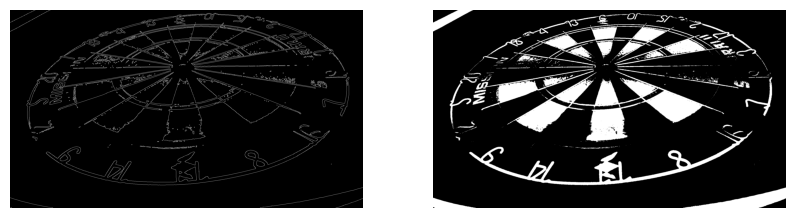

In [10]:
r = 174

# Thresholding the gray image
ret,gray_threshed = cv2.threshold(gray,r,255,cv2.THRESH_BINARY)

# Blur an image
bilateral_filtered_image = cv2.bilateralFilter(gray_threshed, 5, 175, 175)

# Detect edges
edge_detected_image_2 = cv2.Canny(bilateral_filtered_image, 75, 200)

show_images([edge_detected_image_2,gray_threshed])


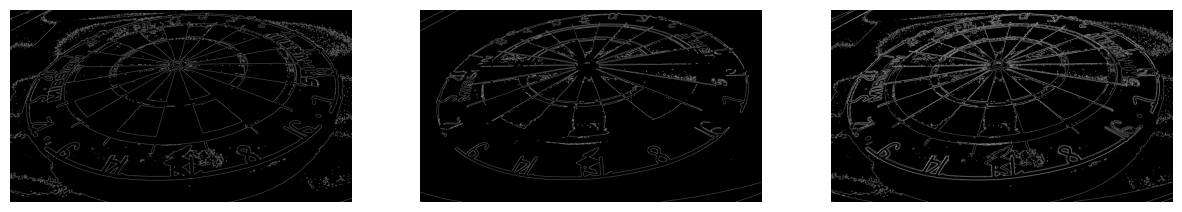

In [11]:

img_combined = edge_detected_image_1 + edge_detected_image_2

show_images([edge_detected_image_1,edge_detected_image_2,img_combined])

True

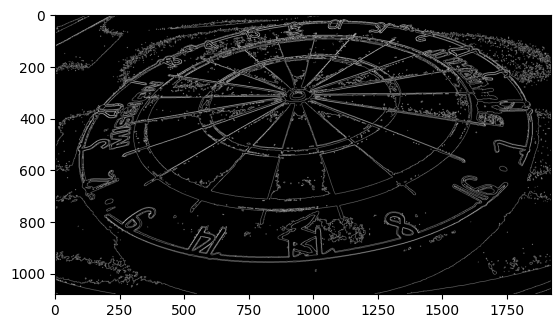

In [12]:
plt.imshow(img_combined, cmap="gray")
cv2.imwrite("edges.png",img_combined)

In [13]:
# Find contours
contours, _ = cv2.findContours(edge_detected_image_1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_list = []
for contour in contours:
    # approximte for circles
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (area > 30) ):
        contour_list.append(contour)
    
    # Draw contours on the original image
cv2.drawContours(clone, contour_list,  -1, (255,0,0), 2)

# there is an outer boundary and inner boundary for each eadge, so contours double
print('Number of found circles: {}'.format(int(len(contour_list)/2)))

#Displaying the results     
cv2.imshow('Objects Detected', gray_threshed)
#cv2.imshow("Treshed", gray_threshed)
cv2.waitKey()
cv2.destroyAllWindows()    
    # ESC to break
    #k = cv2.waitKey(1) & 0xFF
    #if k == 27:
    #    break

# close all open windows
#cv2.destroyAllWindows()

Number of found circles: 46


In [14]:
#pts1 = np.float32([[286, 305], [958, 43],[1569, 308], [748, 814]])

#cv2.imshow("Treshed", gray_threshed)
cv2.waitKey()
cv2.destroyAllWindows()  

# Andere Herangehensweise zum Bestimmen des Graustufenbilds

float64
(1080, 1920)
bool
(1080, 1920)


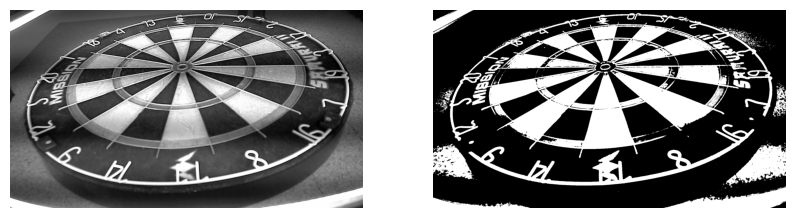

In [15]:
from skimage.filters import threshold_otsu,try_all_threshold,threshold_li
from skimage import io,color


image = color.rgb2gray(io.imread('./images/WIN_20240109_20_42_21_Pro.jpg'))

#thresh = threshold_otsu(image)

thresh = threshold_li(image)
image_bin = image > thresh

print(image.dtype)
print(image.shape)
print(image_bin.dtype)
print(image_bin.shape)


show_images([image,image_bin])

(<Figure size 1000x800 with 8 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Isodata'}>,
        <AxesSubplot: title={'center': 'Li'}>,
        <AxesSubplot: title={'center': 'Mean'}>,
        <AxesSubplot: title={'center': 'Minimum'}>,
        <AxesSubplot: title={'center': 'Otsu'}>,
        <AxesSubplot: title={'center': 'Triangle'}>,
        <AxesSubplot: title={'center': 'Yen'}>], dtype=object))

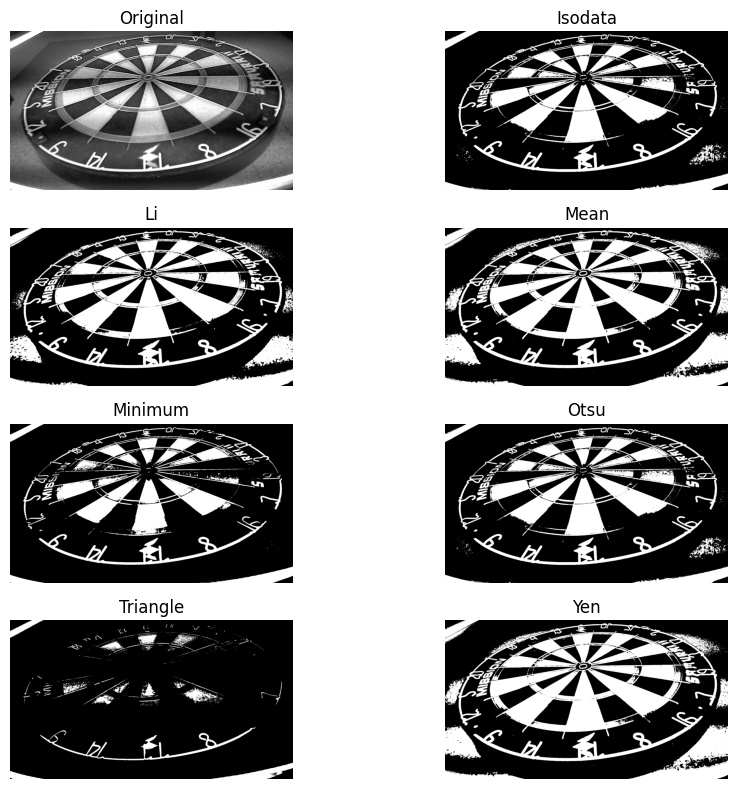

In [16]:
try_all_threshold(image, figsize=(10,8), verbose=False)

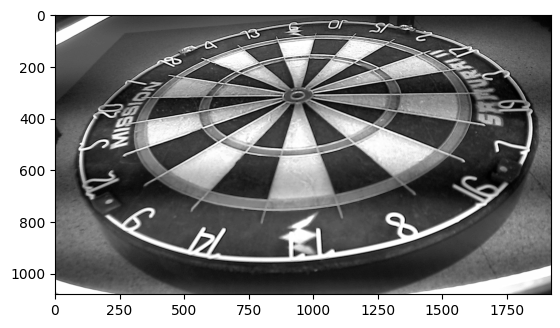

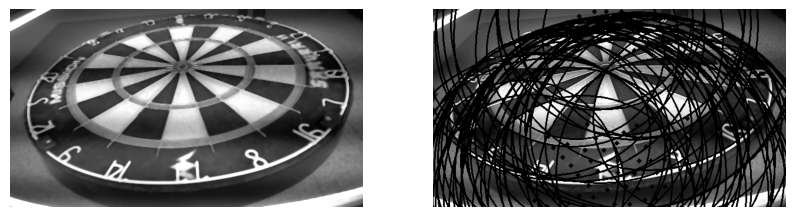

In [17]:
image = cv2.imread('./images/WIN_20240109_20_42_21_Pro.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap="gray")
if image.shape[1] > 600:
    image = imutils.resize(image, width=600)
orig_img = np.copy(image)
image = cv2.medianBlur(image,5)
circles = cv2.HoughCircles(image,cv2.HOUGH_GRADIENT,1,20,param1=150,param2=30,minRadius=150,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(orig_img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(orig_img,(i[0],i[1]),2,(0,0,255),3)


show_images([image,orig_img])

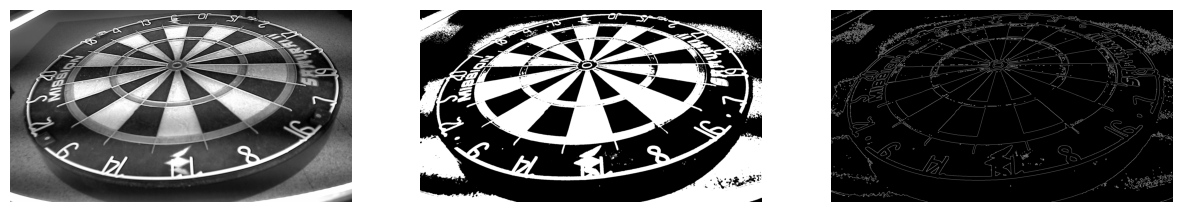

In [18]:
image = cv2.imread('./images/WIN_20240109_20_42_21_Pro.jpg', cv2.IMREAD_GRAYSCALE)

#thresh = threshold_otsu(image)
#image_bin = image > thresh
# Thresholding the gray image

r = 89
#r = 200
ret,gray_threshed = cv2.threshold(image,r,255,cv2.THRESH_BINARY)

# Blur an image
bilateral_filtered_image = cv2.bilateralFilter(gray_threshed, 5, 175, 175)
#imC = exposure.rescale_intensity(image_bin, out_range='uint8')
#in_range='image'
#print(imC.dtype)
#print(imC.shape)

edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)
show_images([image,gray_threshed,edge_detected_image])

In [20]:
#pts1 = np.float32([[253, 354], [881, 48],[1538, 252], [892, 811]])
pts1 = np.float32()
points = []



def click_event(event, x, y, flags, params): 
  
    # checking for left mouse clicks 
    if event == cv2.EVENT_LBUTTONDOWN: 
  
        # displaying the coordinates 
        # on the Shell 
        if len(points) < 4:
            points.append([x,y])
            print(x, ' ', y)
        else:
            print("already done")

        # displaying the coordinates 
        # on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        #cv2.putText(image, str(x) + ',' +str(y), (x,y), font, 1, (255, 0, 0), 2) 
        cv2.circle(image,(x,y),5,(255, 0, 0))
        cv2.imshow('image', image) 


cv2.imshow('image',image)
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows() 

pts1 = np.float32(points)
print(pts1)
pts2 = np.float32([[540, 0], [0, 540],[540, 1080],[1080, 540]])
print(pts2)
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(image, matrix, (1080, 1080))

setup_image = cv2.flip(result, 1)

cv2.imwrite("warped_edges.png",setup_image)
cv2.imshow('Warped Image',  setup_image)
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows() 

np.savetxt("setup_points.csv", pts1, delimiter=",")


158   374
921   31
1756   223
981   952
[[ 158.  374.]
 [ 921.   31.]
 [1756.  223.]
 [ 981.  952.]]
[[ 540.    0.]
 [   0.  540.]
 [ 540. 1080.]
 [1080.  540.]]


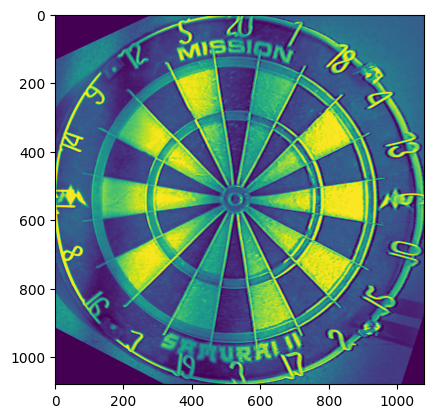

In [ ]:
plt.imshow(setup_image)

[[ 158.  374.]
 [ 921.   31.]
 [1756.  223.]
 [ 981.  952.]]
[[ 540.    0.]
 [   0.  540.]
 [ 540. 1080.]
 [1080.  540.]]


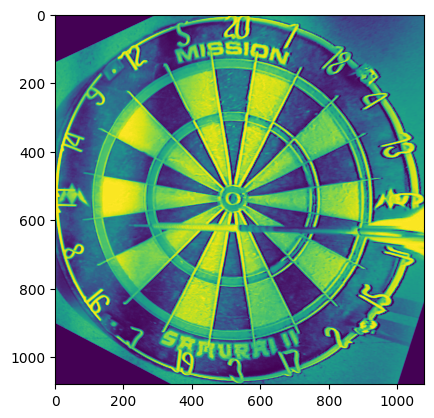

In [43]:
import os
from numpy import genfromtxt
if os.path.exists("setup_points.csv"):
    pts1 = genfromtxt("setup_points.csv", delimiter=',',dtype=np.float32)

    image = cv2.imread('./images/WIN_20240109_20_43_23_Pro.jpg', cv2.IMREAD_GRAYSCALE)
    
    print(pts1)
    pts2 = np.float32([[540, 0], [0, 540],[540, 1080],[1080, 540]])
    print(pts2)
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(image, matrix, (1080, 1080))

    flipped = cv2.flip(result, 1)
    result_hist = cv2.equalizeHist(flipped)
    plt.imshow(result_hist)

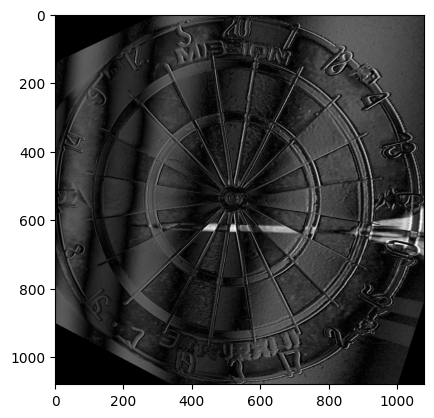

In [46]:
new_img = cv2.absdiff(flipped,cv2.equalizeHist(setup_image))
plt.imshow(new_img, cmap="gray")

(1080, 1080)
1166400
715247
[[[760 622]]

 [[754 625]]

 [[736 621]]

 [[749 644]]

 [[928 604]]

 [[771 587]]

 [[733 625]]

 [[957 554]]

 [[753 641]]

 [[752 622]]

 [[985 566]]

 [[974 565]]

 [[892 609]]

 [[935 562]]

 [[927 524]]

 [[969 548]]

 [[705 638]]

 [[970 530]]

 [[923 605]]

 [[932 558]]

 [[749 638]]

 [[887 601]]

 [[733 644]]

 [[732 647]]

 [[749 622]]

 [[961 547]]

 [[900 610]]

 [[776 586]]

 [[960 549]]

 [[927 557]]

 [[939 569]]

 [[747 580]]

 [[753 578]]

 [[748 583]]

 [[915 606]]

 [[926 579]]

 [[927 531]]

 [[741 622]]

 [[955 526]]

 [[735 649]]

 [[963 525]]

 [[962 532]]

 [[976 513]]

 [[948 560]]

 [[927 550]]]
(45, 1, 2)
[[760 622]]


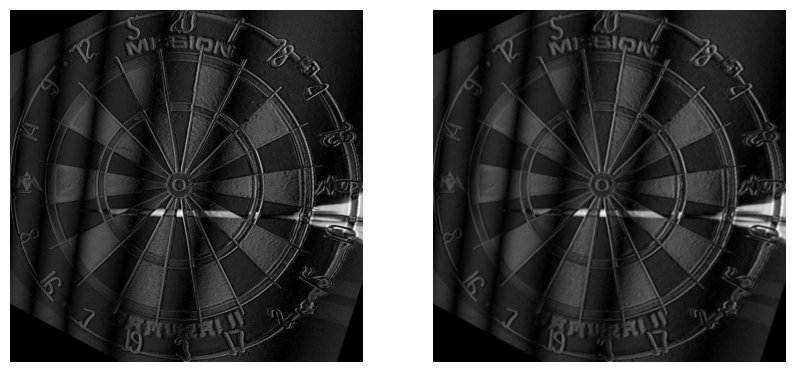

In [77]:
#https://github.com/hanneshoettinger/opencv-steel-darts/blob/master/DartsRecognition.py#L49
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
import math

def dist(x1,y1, x2,y2, x3,y3): # x3,y3 is the point
    px = x2-x1
    py = y2-y1

    something = px*px + py*py

    u =  ((x3 - x1) * px + (y3 - y1) * py) / float(something)

    if u > 1:
        u = 1
    elif u < 0:
        u = 0

    x = x1 + u * px
    y = y1 + u * py

    dx = x - x3
    dy = y - y3

    # Note: If the actual distance does not matter,
    # if you only want to compare what this function
    # returns to other results of this function, you
    # can just return the squared distance instead
    # (i.e. remove the sqrt) to gain a little performance

    dist = math.sqrt(dx*dx + dy*dy)

    return dist


old_image = np.copy(setup_image)
new_image = np.copy(flipped)


#get threshold
blur = cv2.GaussianBlur(new_image, (5, 5), 0)
blur = cv2.bilateralFilter(blur, 9, 75, 75)
_, thresh = cv2.threshold(blur, 60, 255, 0)

print(thresh.shape)
print(thresh.size)
print(cv2.countNonZero(thresh))

#difference
dimg = cv2.absdiff(old_image, new_image)
kernel = np.ones((5, 5), np.float32) / 25
blur = cv2.filter2D(dimg, -1, kernel)


#get corners
edges = cv2.goodFeaturesToTrack(blur, 640, 0.0008, 1, mask=None, blockSize=3, useHarrisDetector=1, k=0.06)  # k=0.08
corners = np.int0(edges)


#filter corners
cornerdata = []
tt = 0
mean_corners = np.mean(corners, axis=0)
for i in corners:
    xl, yl = i.ravel()
    # filter noise to only get dart arrow
    ## threshold important -> make accessible
    if abs(mean_corners[0][0] - xl) > 180:
        cornerdata.append(tt)
    if abs(mean_corners[0][1] - yl) > 120:
        cornerdata.append(tt)
    tt += 1

corners_new = np.delete(corners, [cornerdata], axis=0)  # delete corners to form new array
corners = corners_new
#filter cornersline
rows, cols = blur.shape[:2]
[vx, vy, x, y] = cv2.fitLine(corners, cv2.DIST_HUBER, 0, 0.1, 0.1)
lefty = int((-x * vy / vx) + y)
righty = int(((cols - x) * vy / vx) + y)

cornerdata = []
tt = 0
for i in corners:
    xl, yl = i.ravel()
    # check distance to fitted line, only draw corners within certain range
    distance = dist(0, lefty, cols - 1, righty, xl, yl)
    if distance > 40:  ## threshold important -> make accessible
        cornerdata.append(tt)

    tt += 1

corners_final = np.delete(corners, [cornerdata], axis=0)  # delete corners to form new array
print(corners_final)
print(corners_final.shape)
print(corners_final[0])
show_images([dimg,blur])

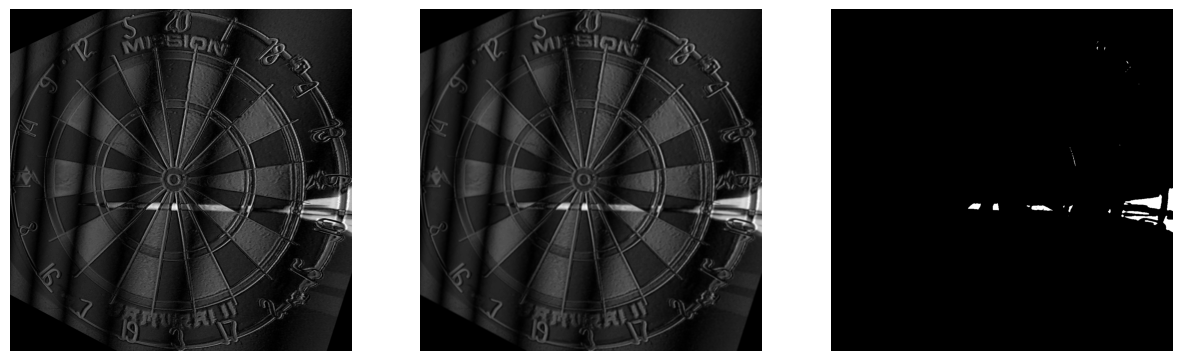

In [90]:
image_bin = blur > 150
#print(np.mean(blur))
show_images([dimg,blur,image_bin])

In [71]:
#plt.plot(corner_coords[:, 1], corner_coords[:,0], 'bo', markerfacecolor='None',markersize=5, label='corners')
for c in corners_final:
    print(c)
    cv2.circle(new_image,(c[0][0],c[0][1]),3,(255))
cv2.imshow('img', new_image)
#cv2.imshow("Treshed", gray_threshed)
cv2.waitKey()
cv2.destroyAllWindows()    

[[760 622]]
[[754 625]]
[[736 621]]
[[749 644]]
[[928 604]]
[[771 587]]
[[733 625]]
[[957 554]]
[[753 641]]
[[752 622]]
[[985 566]]
[[974 565]]
[[892 609]]
[[935 562]]
[[927 524]]
[[969 548]]
[[705 638]]
[[970 530]]
[[923 605]]
[[932 558]]
[[749 638]]
[[887 601]]
[[733 644]]
[[732 647]]
[[749 622]]
[[961 547]]
[[900 610]]
[[776 586]]
[[960 549]]
[[927 557]]
[[939 569]]
[[747 580]]
[[753 578]]
[[748 583]]
[[915 606]]
[[926 579]]
[[927 531]]
[[741 622]]
[[955 526]]
[[735 649]]
[[963 525]]
[[962 532]]
[[976 513]]
[[948 560]]
[[927 550]]


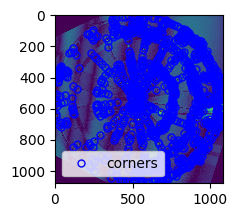

In [68]:


im_gray = im

corners = corner_harris(im_gray, k = 0.02)
corner_coords = corner_peaks(corners, min_distance=5, threshold_rel=0.01)
plt.subplot(212), 
plt.imshow(im, interpolation='nearest')
plt.plot(corner_coords[:, 1], corner_coords[:,0], 'bo', markerfacecolor='None',markersize=5, label='corners')
#plt.plot(corner_coords_subpix[:, 1], corner_coords_subpix[:, 0], 'r+', markersize=10, label='subpix_corners'), plt.axis('off')
plt.legend()

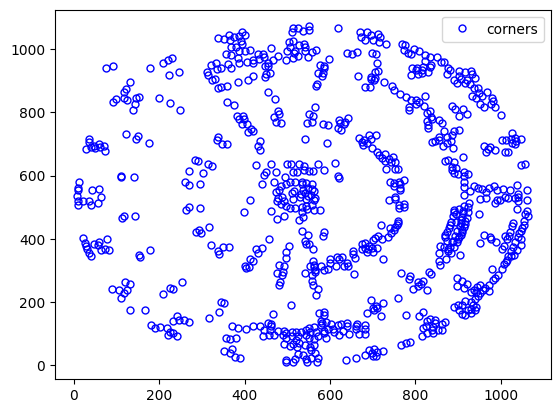

In [42]:
plt.subplot(111), 
plt.plot(corner_coords[:, 1], corner_coords[:, 0], 'bo', markerfacecolor='None',markersize=5, label='corners')
plt.legend()

